# Tarea 2

* Sofía Cruz T. (**@cutsof**)
* Daniel Martínez U. (**@danmarurr**)

**Envío del PR inicial:** lunes 5 de septiembre

**Aceptación del PR:** lunes 19 de septiembre

**NOTA** El máximo número de colaboradores es 2, cuyos nombres deben ser incluidos con claridad a la hora de hacer el PR, por ejemplo, mandándo copia a los coautores. Si usan ideas de cualquier fuente, favor de incluir la referencia apropiada. (En otras palabras, sí está permitido usar otras fuentes, pero incluyan las referencias.)

---

1) Consideren la función

\begin{equation}
z_{n+1} = z_n^2 + c, 
\end{equation}

con `c = 0.12256484161600012 - 0.74486407104im`. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).

- ¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?

- Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

# Problema 1

Para resolver este problema implementaremos tres funciones: `mapeo1` para calcular el mapeo, `crea_malla` para crear la malla en $[-1,1]\times[-1,1]$ y finalmente `conteo1` para contar los valores finitos distintos.

In [29]:
using PyPlot

In [41]:
sqrt(0.12256484161600012 - 0.74486407104im)

0.6623614490371831 - 0.5622791544727911im

In [3]:
f(0.0 + 0*im)

-0.12256484153955312 + 0.7448640710447553im

In [24]:
"""
`mapeo1` calcula el término `n` de la función z_{n+1} = z_n^2 + c, donde 
c = 0.12256484161600012 - 0.74486407104im y `z0` es un valor definido por el usuario.
"""
function mapeo1(n::Int64, z0)
    @assert n≥1 "n tiene que ser mayor o igual a 0"
    c = complex(0.12256484161600012,-0.74486407104)
   
    for j in 1:n
        z0 = copy(z0)^2 - c
    end
    return z0
end

"""
`crea_malla` crea una malla en `domRe`x`domIm` usando separaciones Δx = Δ[1] y Δy = Δ[2]. Se regresa una matriz 
con entradas del tipo `Complex{Float64}` con dicha malla.

***Notas:***

- El valor predeterminado para Δ es [0.025, 0.025].

- `domRe` y `domIm` deben ser arreglos de `Float64` con la siguiente información:

`domRe` = [`x_min`, `x_max`], `domIm` = [`y_min`, `y_max`]
"""
function crea_malla(domRe::Array{Float64}, domIm::Array{Float64}, Δ = [0.0025, 0.0025])
    @assert length(domRe) == 2 && length(domIm) == 2 && length(Δ) == 2 "Uno o varios de los argumentos tienen información faltante o sobrante"
    @assert Δ[1] > 0 && Δ[2]> 0 "El valor de separación debe ser positivo"
    @assert Δ[1] < abs(domRe[1] - domRe[2]) && Δ[2] < abs(domIm[1] - domIm[2]) "El valor de separación debe ser menor al tamaño de los intervalos"
    δx = collect(domRe[1]:Δ[1]:domRe[2])
    δy = collect(domIm[1]:Δ[2]:domIm[2])
    n = length(δx)
    m = length(δy)
    malla = zeros(Complex{Float64}, n, m)
    #Llenamos la malla
    for j in 1:m
        for i in 1:n
            malla[i, j] = δx[j] + im*δy[m + 1 - i]
        end
    end
    return malla
end

"""
`complexmap` mapea la función compleja `f` en la malla de números complejos `malla`
"""
function complexmap(f::Function, malla::Array{Complex{Float64},2})
    fz = zeros(malla)
    for j in 1:length(malla)
        fz[j] = f(malla[j])
    end
    return fz
end

"""
`problema1` realiza el mapeo de la función considerada en el problema 1 en el dominio considerado (por defecto), usando
`n` iteraciones.
"""
function problema1(n::Int, domRe = [-1.0,1.0], domIm = [-1.0,1.0], Δ = [0.0025, 0.0025], f = mapeo1)
    @assert n ≥ 0 "n debe ser mayor o igual a 0"
    @assert length(domRe) == 2 && length(domIm) == 2 && length(Δ) == 2 "Uno o varios de los argumentos tienen información faltante o sobrante"
    @assert Δ[1] > 0 && Δ[2]> 0 "El valor de separación debe ser positivo"
    @assert Δ[1] < abs(domRe[1] - domRe[2]) && Δ[2] < abs(domIm[1] - domIm[2]) "El valor de separación debe ser menor al tamaño de los intervalos"
    malla1 = crea_malla(domRe, domIm, Δ)
    f(x) = mapeo1(n, x)
    fm = complexmap(f, malla1)
    
    zm1 = zeros(fm)
    for j in 1:length(fm)
        if abs(fm[j].re) < 1 && abs(fm[j].im) < 1
            zm1[j] = fm[j]
        end
    end
    return zm1
end

problema1 (generic function with 5 methods)

In [25]:
ab = problema1(1000);

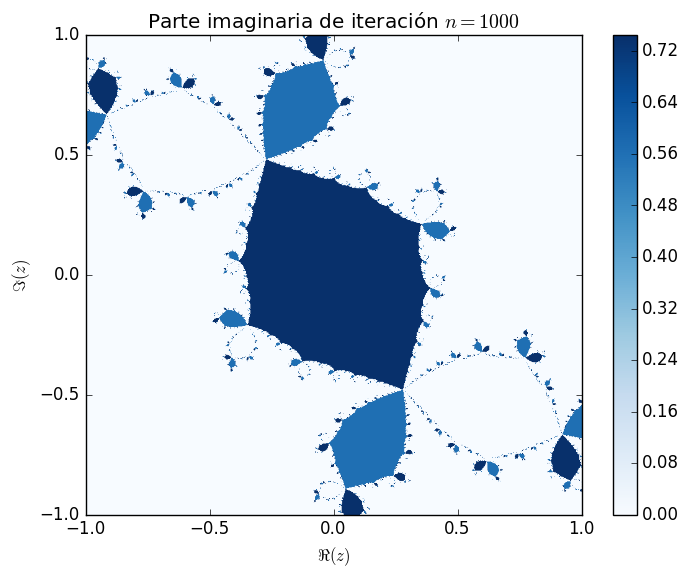

PyObject <matplotlib.text.Text object at 0x7ff0300e4eb8>

In [32]:
imshow(imag(ab),cmap = "Blues", extent =[-1.0, 1.0, -1.0, 1.0],aspect="auto")

xlabel(L"\Re(z)")
ylabel(L"\Im(z)")
colorbar()
title(L"Parte imaginaria de iteración $n=1000$")

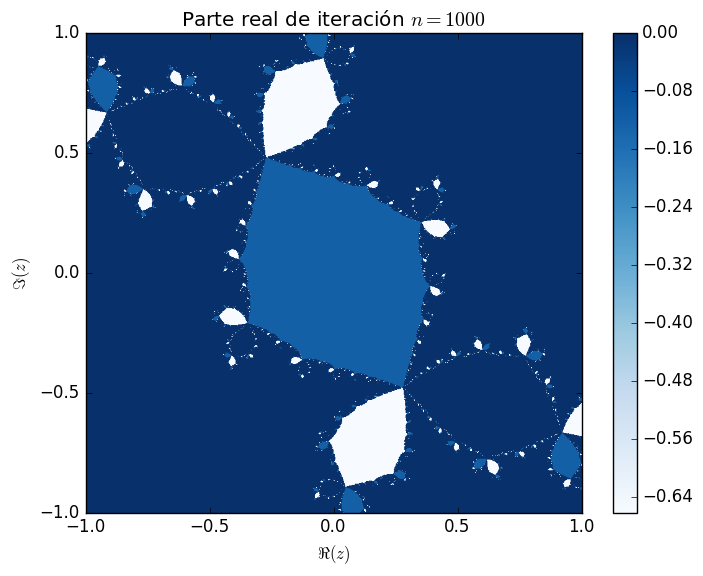

PyObject <matplotlib.text.Text object at 0x7ff02d63b4e0>

In [35]:
imshow(real(ab),cmap = "Blues", extent =[-1.0, 1.0, -1.0, 1.0],aspect="auto")

xlabel(L"\Re(z)")
ylabel(L"\Im(z)")
colorbar()
title(L"Parte real de iteración $n=1000$")

In [40]:
mod(2.7,1)

0.7000000000000002

In [23]:
length(zm1)

197181

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{n}) = 2x_n \mod 1.
\end{equation}

- Obtengas los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{x_n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

*Hint: Sean imaginos y no se conformen*

In [56]:
function mapeo2(n::Int, x::Float64)
    for j in 1:n
        x = mod(2x,1)
    end
    return x
end

mapeo2 (generic function with 1 method)

In [62]:
h(x) = mapeo2(100, x)

h (generic function with 1 method)

In [63]:
function pfijos(f, dom = collect(-1:0.025:1))
    it = zeros(dom)
    for j in 1:length(dom)
        it[j] = f(dom[j])
    end
    return it, abs(it - dom)
end

pfijos (generic function with 2 methods)

In [79]:
mapeo2(2, 5.0)

0.0

In [80]:
map1, dif1 = pfijos(h);